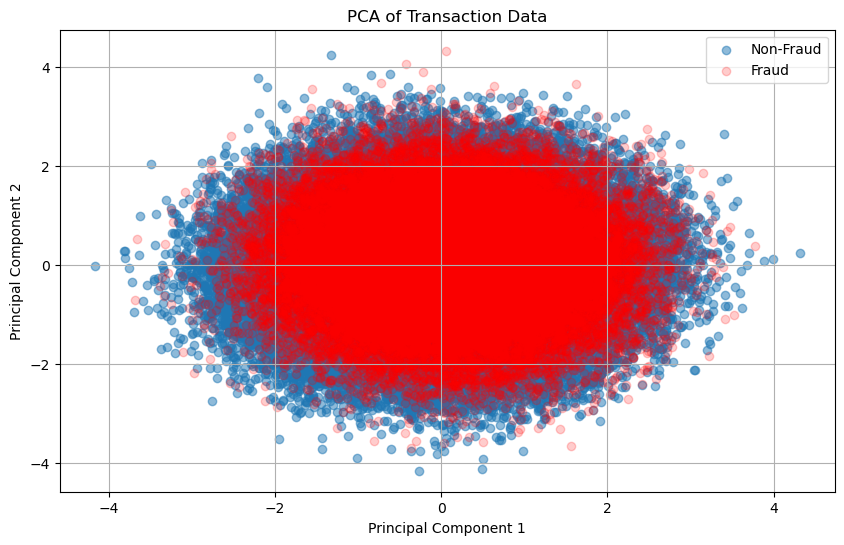

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv('upii.csv')

# Dropping non-numeric columns that won't be useful for PCA
columns_to_drop = ['TransactionID', 'UserID', 'SenderUPIID', 'ReceiverUPIID', 'DeviceID', 'IPAddress', 'GeoLocation', 'TransactionType', 'BankAccountNumber']
data_numeric = data.drop(columns=columns_to_drop)

# Encoding categorical columns: 'Status'
label_encoder = LabelEncoder()
data_numeric['Status'] = label_encoder.fit_transform(data_numeric['Status'])

# Separating features and target variable
X = data_numeric.drop('IsFraud', axis=1)
y = data_numeric['IsFraud']

# Identify and encode all remaining non-numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['IsFraud'] = y.values

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['IsFraud'] == 0]['PC1'], pca_df[pca_df['IsFraud'] == 0]['PC2'], label='Non-Fraud', alpha=0.5)
plt.scatter(pca_df[pca_df['IsFraud'] == 1]['PC1'], pca_df[pca_df['IsFraud'] == 1]['PC2'], label='Fraud', alpha=0.2, color='r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Transaction Data')
plt.legend()
plt.grid(True)
plt.show()


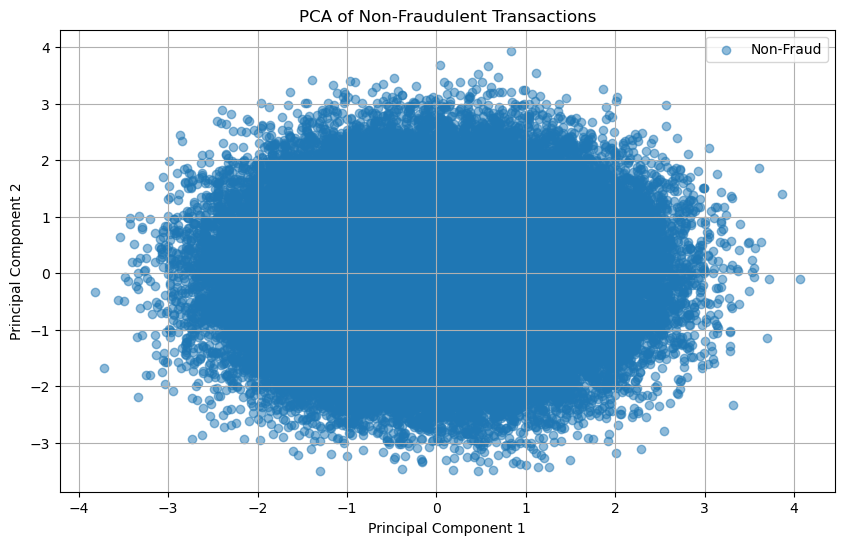

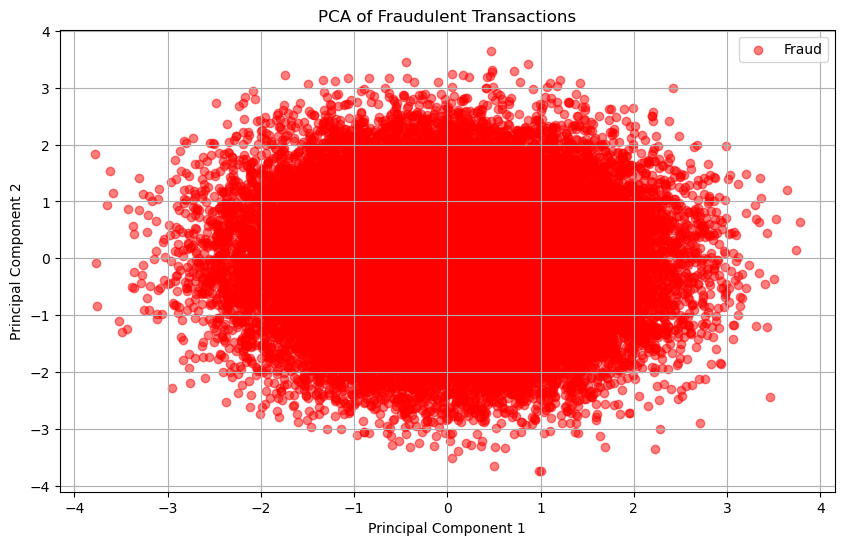

In [11]:


# Plotting the PCA results for non-fraudulent transactions
plt.figure(figsize=(10, 6))
plt.scatter(pca_non_fraud['PC1'], pca_non_fraud['PC2'], alpha=0.5, label='Non-Fraud')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Non-Fraudulent Transactions')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the PCA results for fraudulent transactions
plt.figure(figsize=(10, 6))
plt.scatter(pca_fraud['PC1'], pca_fraud['PC2'], alpha=0.5, color='r', label='Fraud')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fraudulent Transactions')
plt.legend()
plt.grid(True)
plt.show()
